In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import mean_squared_error as rmse
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

# Data cleaning

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no null value present in dataset.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

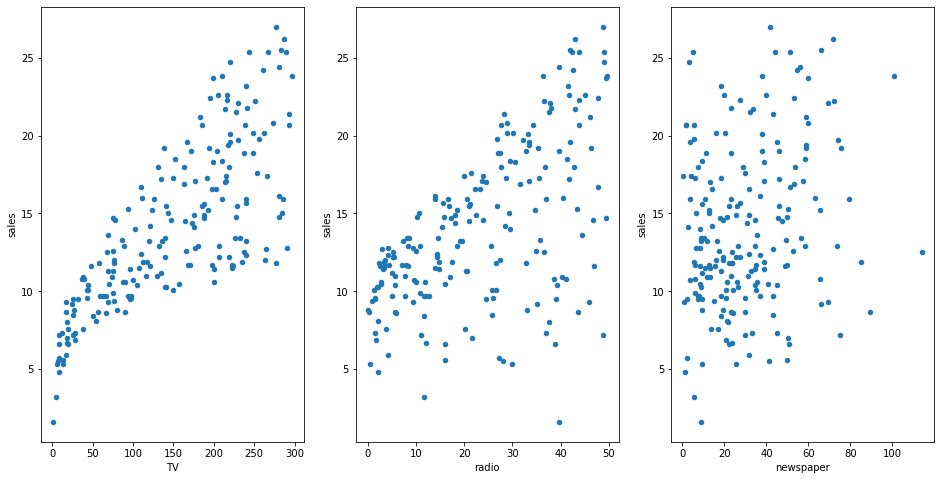

In [7]:
fig,axs=plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df=df.drop(columns=['Unnamed: 0'])

In [13]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

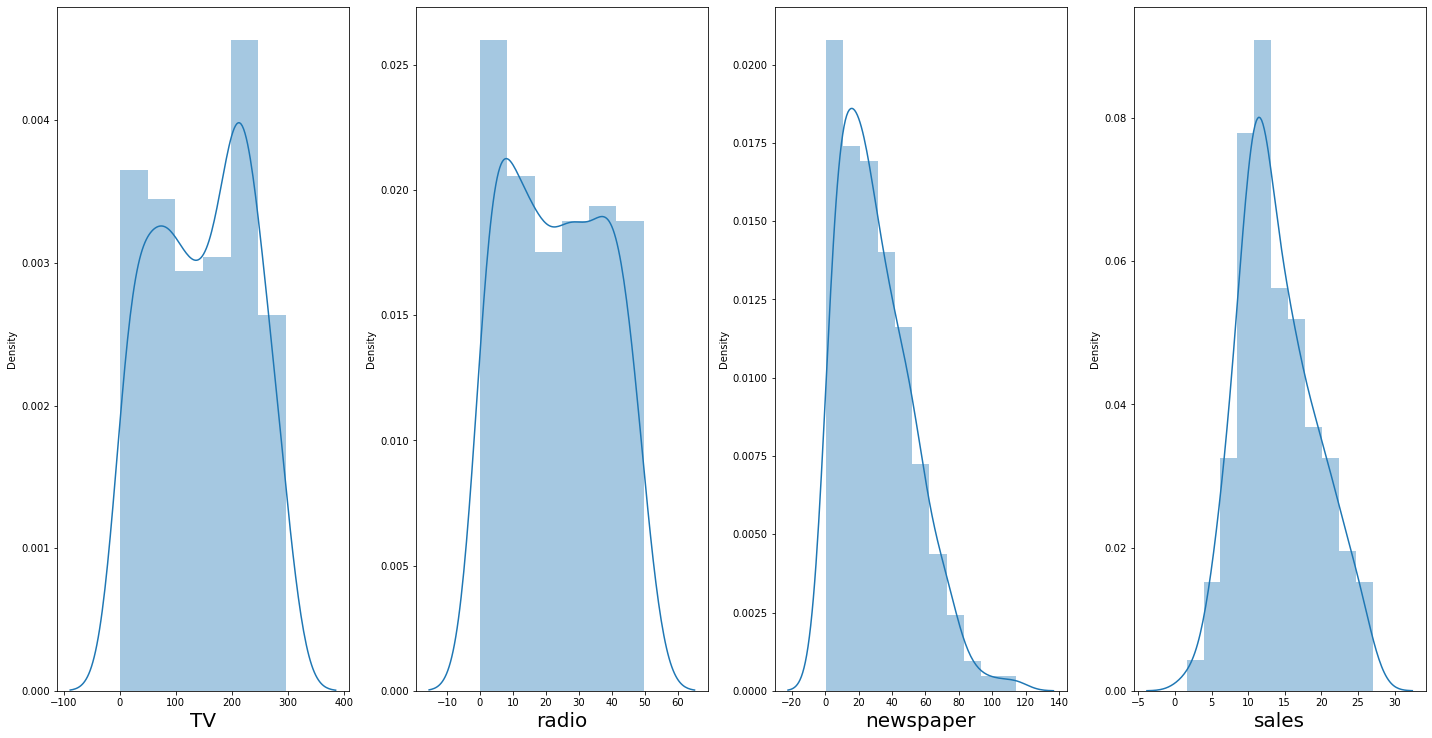

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() # plt.show()

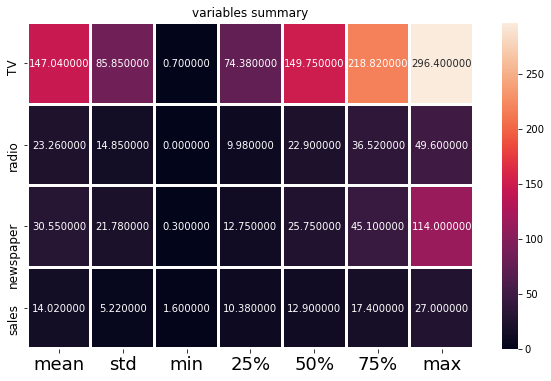

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

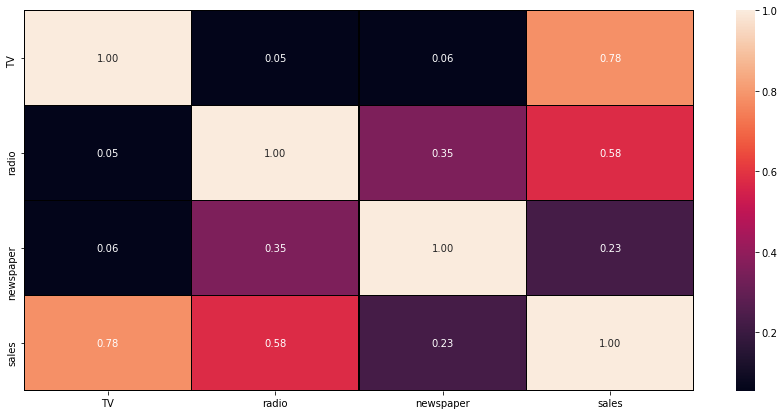

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

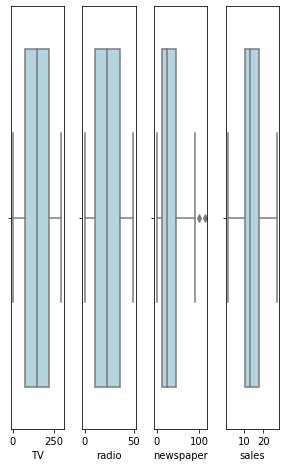

In [31]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='lightblue',orient='h')
    plt.tight_layout()

In newspaper it shows outlier.

In [87]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV+radio',data=df).fit()
lm.rsquared

0.8971942610828957

In [88]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.rsquared

0.8972106381789522

In [91]:
df=df.drop(columns=['newspaper'])
df

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


After adding newspaper no sales is increase so there is no need of newspaper

In [92]:
df.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

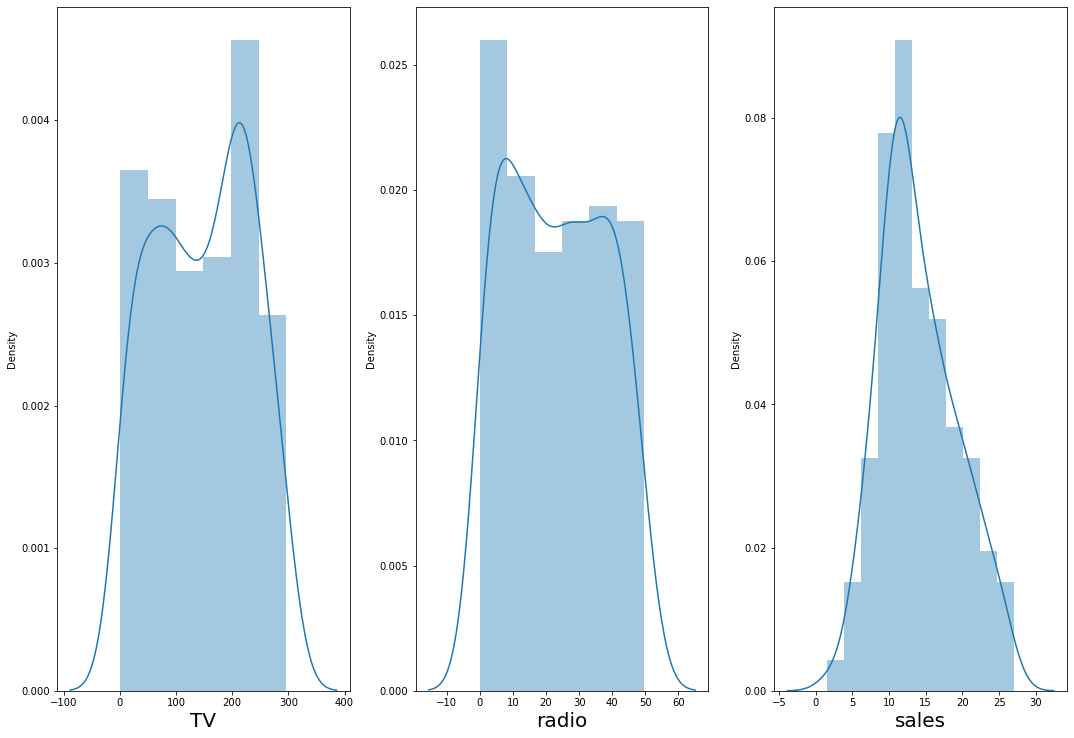

In [93]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [94]:
y=df['sales']
x=df.drop(columns=['sales'])
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [95]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


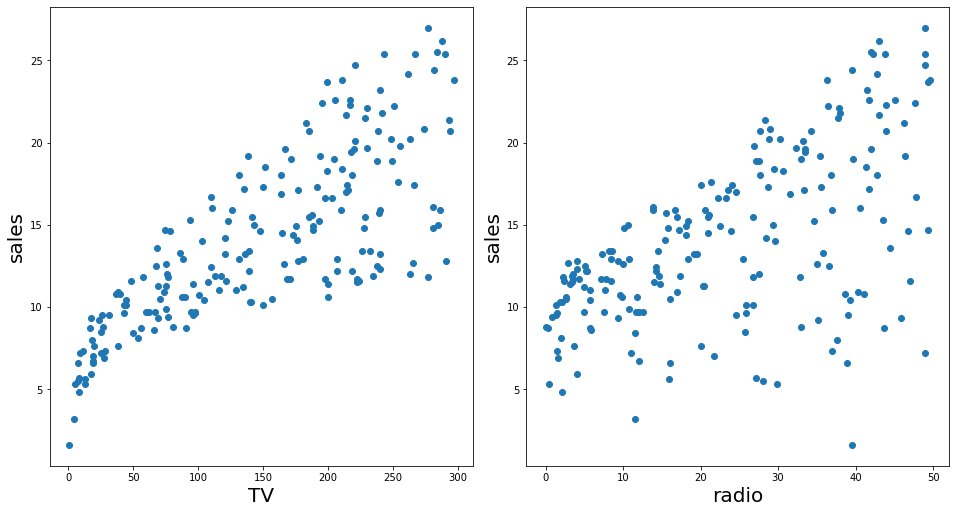

In [96]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [97]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled 

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=2435323)
y_train.head()

115    12.6
52     22.6
161    13.3
147    25.4
170     8.4
Name: sales, dtype: float64

In [99]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [100]:
df.tail(5)

,TV,radio,sales
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5
199,232.1,8.6,13.4


In [109]:
print('Sales is:',regression.predict(scaler.transform([[350.0,50.0]])))

Sales is: [28.4874139]


In [110]:
#adjusted R2 score
regression.score(x_train,y_train)

0.8999424474756919

In [111]:
regression.score(x_test,y_test)

0.8748602329536908

In [112]:
# plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([12.22273569,  9.660438  , 21.96012958, 15.24530405, 21.15297442,
       18.84978518, 13.07241504, 17.34751756,  3.84307615,  9.93195516,
       14.23360617, 14.39969003, 10.10572085,  8.00684412, 14.37551373,
       15.34178485,  7.77213929, 13.14821659, 12.31713286, 21.80083581,
       12.69365489, 12.23436631, 16.64771616, 15.60843527, 21.88796494,
        9.5414041 , 17.90591266, 13.01882851, 11.54782454, 10.23850695,
       19.39940847, 19.10169841, 18.44099699, 21.76059346, 19.8629955 ,
       24.26820887, 16.6212289 , 15.00621622, 14.44500602, 12.19446784,
       24.29140308,  9.03865006, 19.20400474, 15.23870044,  9.80577267,
       13.11249711, 11.48916148, 12.08647585, 16.60898336, 21.2000739 ])

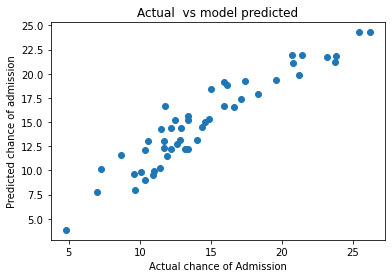

In [113]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual  vs model predicted')
plt.show()

# Model Evaluation

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [115]:
y_pred=regression.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

1.7286144395016394

In [116]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [117]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [118]:
alpha=lasscv.alpha_
alpha

0.0016262976531266383

In [119]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0016262976531266383)

In [120]:
lasso_reg.score(x_test,y_test)

0.8748527826977334

In [121]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [122]:
ridgecv.alpha_

0.001

In [123]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [124]:
ridge_model.score(x_test,y_test)

0.8748607490560962

# Model Saving

In [127]:
import pickle
filename='advertise.pkl'
pickle.dump(regression,open(filename,'wb'))

# Conclusion

In [129]:
import numpy as np
a=np.array(y_test)
predicted=np.array(regression.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,13.2,12.222736
1,9.6,9.660438
2,21.4,21.960130
3,12.5,15.245304
4,20.8,21.152974
5,16.1,18.849785
6,11.7,13.072415
7,17.1,17.347518
8,4.8,3.843076
9,11.0,9.931955
